In [16]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [19]:
# Load CSV file
df = pd.read_csv("/Users/Kerem/Dropbox/Software/Kerem/Development/Huruf/data/ml_all.csv", encoding="ISO-8859-1")
df.head()

,sure,content,ayn,elif,ha,kaf,lam,mim,nun,ra,ta,sad,sin,ya
0,Araf,"Alif, Lam, Mim, Sad. A Book revealed unto thee...",0,1,0,0,1,1,0,0,0,1,0,0
1,Meryem,Kaf. Ha. Ya. Â´Ain. Sad. (This is) a recital o...,1,0,1,1,0,0,0,0,0,1,0,1
2,Suara,Ta. Sin. Mim. These are verses of the Book tha...,0,0,0,0,0,1,0,0,1,0,1,0
3,Zuhruf,"Ha-Mim By the Book that makes things clear,- W...",0,0,1,0,0,1,0,0,0,0,0,0
4,Ä°brahim,A. L. R. A Book which We have revealed unto th...,0,1,0,0,1,0,0,1,0,0,0,0


In [20]:
# Number of Sure for each Huruf
df_toxic = df.drop(['sure', 'content'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['huruf', 'number_of_sure'])
df_stats





,huruf,number_of_sure
0,ayn,1
1,elif,13
2,ha,9
3,kaf,2
4,lam,13
5,mim,17
6,nun,1
7,ra,5
8,ta,4
9,sad,3


Text(0.5, 0, 'category')

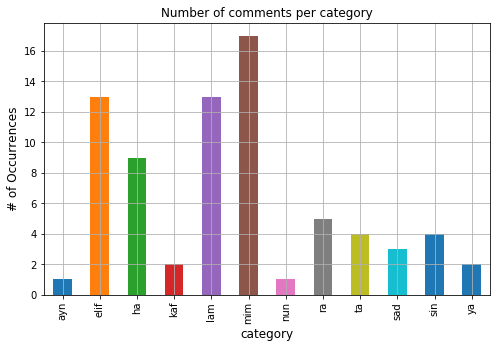

In [23]:
# See in graph
df_stats.plot(x='huruf', y='number_of_sure', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

Text(0.5, 0, '# of categories')

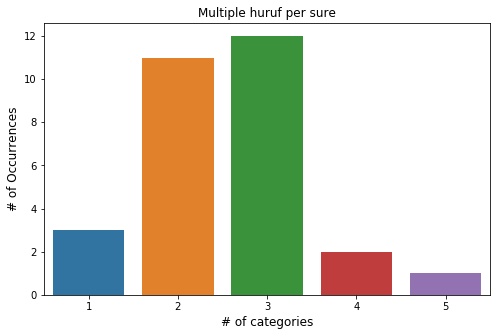

In [24]:
# Hurufs on multiple sures
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple huruf per sure")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

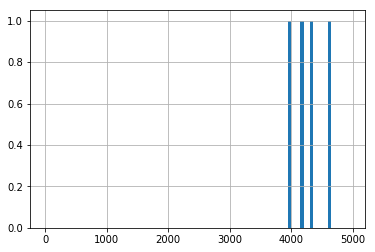

In [25]:
# Sure length
lens = df.content.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [45]:
# Split data into train / test
categories = [
    "ayn",
    "elif",
    "ha",
    "kaf",
    "lam",
    "mim",
    "nun",
    "ra",
    "ta",
    "sad",
    "sin",
    "ya"
]
train, test = train_test_split(df, random_state=42, test_size=0.25, shuffle=True)
X_train = train.content
X_test = test.content
print(X_train.shape)
print(X_test.shape)

(21,)
(8,)


In [46]:
# Try naive bayes
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing ayn
Test accuracy is 1.0
... Processing elif
Test accuracy is 0.625
... Processing ha


Test accuracy is 0.625
... Processing kaf
Test accuracy is 1.0
... Processing lam


Test accuracy is 0.625
... Processing mim
Test accuracy is 0.75
... Processing nun
Test accuracy is 0.875
... Processing ra


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing ta
Test accuracy is 0.875
... Processing sad
Test accuracy is 0.875
... Processing sin


Test accuracy is 0.875
... Processing ya
Test accuracy is 1.0


In [47]:
# Linear SVC
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing ayn
Test accuracy is 1.0
... Processing elif
Test accuracy is 0.5
... Processing ha


Test accuracy is 0.625
... Processing kaf
Test accuracy is 1.0
... Processing lam


Test accuracy is 0.5
... Processing mim
Test accuracy is 0.75
... Processing nun
Test accuracy is 0.875
... Processing ra


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing ta
Test accuracy is 0.875
... Processing sad
Test accuracy is 0.875
... Processing sin


Test accuracy is 0.875
... Processing ya
Test accuracy is 1.0


In [48]:
# Logistic regression
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing ayn
Test accuracy is 1.0
... Processing elif
Test accuracy is 0.5
... Processing ha


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.625
... Processing kaf
Test accuracy is 1.0
... Processing lam


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.5
... Processing mim
Test accuracy is 0.75
... Processing nun


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.875
... Processing ra
Test accuracy is 1.0
... Processing ta


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.875
... Processing sad
Test accuracy is 0.875
... Processing sin


Test accuracy is 0.875
... Processing ya
Test accuracy is 1.0


/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/kerem/Dropbox/Software/Kerem/Development/Huruf/venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
